# Traffic Sign Classification

The dataset have 34799 samples, labeled with 43 different group.

In [130]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import os
import pickle

### Import Images
Each image is 32\*32\*3 dimensions.

In [84]:
path = "traffic sign classification/myData" # folder with all the class folders
labelFile = 'traffic sign classification/labels.csv' # file with all names of classes
batch_size_val=10  # how many to process together
steps_per_epoch_val=2000
epochs_val=10 #这个可以改 其他的参数除非知道意思不然别改
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation

In [85]:
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path) #返回path文件夹里包含的文件或文件夹的名字的列表
print("Total Classes Detected:",len(myList)) #path里一共包含了43个文件夹
noOfClasses=len(myList) #一共有多少类
print("Importing Classes.....")
for x in range (0,len(myList)): #0,1,2,...,42 共43类
    myPicList = os.listdir(path+"/"+str(count)) #路径为'myData(=path)/名字为count的子文件夹'
    for y in myPicList: #在这个子文件夹中，其实就是一个类的训练样本
        curImg = cv2.imread(path+"/"+str(count)+"/"+y) #读取图像，默认读的是彩色的
        images.append(curImg)  #把图像在列表里
        classNo.append(count) #把每个图片的类存在列表里
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images) #图片样本集合
classNo = np.array(classNo) #每个图片样本对应的类

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


This shows the number of classes ———— 43, and the name of each class.

### Split Data
In this part, we will split the data into train, validation and test set.

In [86]:
############################### Split Data
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio, random_state = 0, stratify = classNo)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio, random_state = 0, stratify = y_train)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [87]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


This shows the dimension of each set. 

In [146]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


This 'lableFile' gives us the name of each class.

### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
This part shows 5 representative images of each class, to give us a clear understanding of what each class is about.

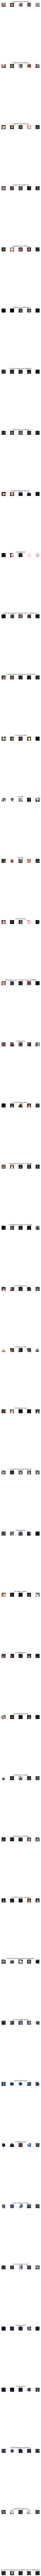

In [89]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300)) #一共有43类所有画43行，每一列给这一类中的5个样本图片，设定一个figure size
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows(): #遍历每一行 返回index和值
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :, :])#, cmap=plt.get_cmap("gray")) #展示出来j, i 个图片
        axs[j][i].axis("off") #关闭坐标轴，在图片上不显示坐标轴
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected)) #j类有多少个样本

### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
The bar chart will tell us how many samples in each class, and we will see that the samples are not evenly distributed in the classes. There are some groups having larger number of samples and there are some groups having smaller number of samples.

[115, 1267, 1286, 806, 1133, 1056, 230, 826, 806, 845, 1152, 749, 1210, 1229, 442, 346, 230, 634, 691, 115, 192, 173, 211, 288, 154, 864, 346, 135, 307, 154, 250, 442, 134, 383, 230, 691, 211, 115, 1190, 173, 192, 134, 134]


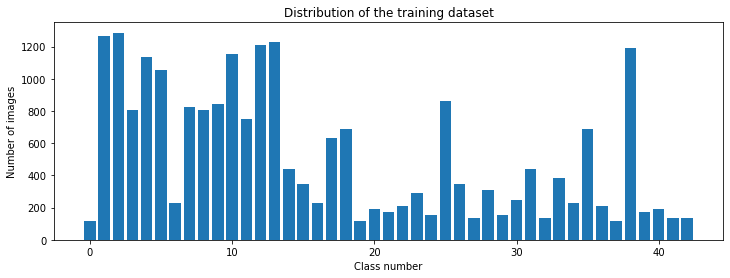

In [90]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples) #存有每一类的样本数
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show() #not evenly distributed , 就会有一个class 很好分类 另一个class就分的不好，就不会有enough 样本of each class，在最后会有多大的data set is required to have 好的分类

### Normalize the Dataset
We will change the values in X matrix from 0-255 to 0-1, and convert y into a row vector which contains only 0 and 1, for example, this sample belongs to class 4, so the 4th value of its y vector is 1 and the others are 0.

In [91]:
####################TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
def convert_to_one_hot(y, C):
    return np.eye(C)[y.reshape(-1)]
X_train = X_train/255.
X_validation = X_validation/255
X_test = X_test/255.
y_train = convert_to_one_hot(y_train, 43)
y_validation = convert_to_one_hot(y_validation, 43)
y_test = convert_to_one_hot(y_test, 43)

In [92]:
print ("number of training examples = " + str(X_train.shape[0]))
print('number of validation examples = ' + str(X_validation.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_validation shape: " + str(X_validation.shape))
print ("y_validation shape: " + str(y_validation.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))


number of training examples = 22271
number of validation examples = 5568
number of test examples = 6960
X_train shape: (22271, 32, 32, 3)
y_train shape: (22271, 43)
X_validation shape: (5568, 32, 32, 3)
y_validation shape: (5568, 43)
X_test shape: (6960, 32, 32, 3)
y_test shape: (6960, 43)


### Model Preparation

#### Function *create_placeholders()*
This function takes the dimension of X_train and y_train as input, and returns the needed dimensions and space of the training data for running the model.

In [93]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):

    X = tf.placeholder(tf.float32,[None, n_H0, n_W0, n_C0])
    y = tf.placeholder(tf.float32,[None, n_y])

    
    return X, y

In [147]:
###try
#X, y = create_placeholders(32, 32, 3, 43)
#print ("X = " + str(X))
#print ("y = " + str(y))

#### Function **initialize_parameters()**
Since we will use the AlexNet as our CNN framework, so this function provides the initialized parameters needed in the later model.

In [95]:
def initialize_parameters():
    
    
    tf.set_random_seed(1)                              

    W1 = tf.get_variable('W1', [11,11,3,96], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('W2', [5,5,96,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable('W3', [3,3,256,384], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W4 = tf.get_variable('W4', [3,3,384,384], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W5 = tf.get_variable('W5', [3,3,384,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))

    #b1 = tf.Variable(tf.constant(0,shape=96),dtype=tf.float32)
    #b2 = tf.Variable(tf.constant(0,shape=256),dtype=tf.float32)
    #b3 = tf.Variable(tf.constant(0,shape=384),dtype=tf.float32)
    #b4 = tf.Variable(tf.constant(0,shape=384),dtype=tf.float32)
    #b5 = tf.Variable(tf.constant(0,shape=256),dtype=tf.float32)
    


    parameters = {"W1": W1,
                  "W2": W2,
                 "W3": W3,
                 "W4": W4,
                 "W5": W5}
                 #"b1": b1,
                 #"b2": b2,
                 #"b3": b3,
                 #"b4": b4,
                 #"b5": b5}
    
    return parameters

In [148]:
####try
#tf.reset_default_graph()
#with tf.Session() as sess_test:
#    parameters = initialize_parameters()
#    init = tf.global_variables_initializer()
#    sess_test.run(init)
#    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
#    print("W1.shape: " + str(parameters["W1"].shape))
#    print("\n")
#    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
#    print("W2.shape: " + str(parameters["W2"].shape))

##  Build the CNN Model
We will use the AlexNet in building the model.

In [97]:

def forward_propagation(X, parameters):
        
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    #b1 = parameters['b1']
    #b2 = parameters['b2']
    #b3 = parameters['b3']
    #b4 = parameters['b4']
    #b5 = parameters['b5']
    
    
    # CONV2D: filter W1, stride of 4, padding 'SAME'
    Z1 = tf.nn.conv2d(X,W1, strides = [1,4,4,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 2x2, stride 2, padding 'valid'
    P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 2x2, stride 2, padding 'valid'
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #CONV2D: filter W3, stride 1, padding = 'same'
    Z3 = tf.nn.conv2d(P2, W3, strides = [1,1,1,1], padding = 'SAME')
    A3 = tf.nn.relu(Z3)
    
    #CONV2D: filter W4, stride 1 padding = 'same'
    Z4 = tf.nn.conv2d(A3, W4, strides = [1,1,1,1], padding = 'SAME')
    A4 = tf.nn.relu(Z4)
    
    #CONV2D: filter W5, stride 1 padding = 'same'
    Z5 = tf.nn.conv2d(A4, W5, strides = [1,1,1,1], padding = 'SAME')
    A5 = tf.nn.relu(Z5)
    #MAXPOOL: window 2x2, stride = 2 padding = 'valid'
    P5 = tf.nn.max_pool(A5, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # FLATTEN
    F6 = tf.contrib.layers.flatten(P5)
    Z6 = tf.contrib.layers.fully_connected(F6, num_outputs = 2304, activation_fn=tf.nn.relu)
    
    #flatten
    Z7 = tf.contrib.layers.fully_connected(Z6, num_outputs = 1152, activation_fn=tf.nn.relu)
    
    #flatten
    Z8 = tf.contrib.layers.fully_connected(Z7, num_outputs = 43, activation_fn = None)

    return Z8

In [98]:
######try
#tf.reset_default_graph()

#with tf.Session() as sess:
#    np.random.seed(1)
#    X, y = create_placeholders(32, 32, 3, 43)
#    parameters = initialize_parameters()
#    Z8 = forward_propagation(X, parameters)
#    init = tf.global_variables_initializer()
#    sess.run(init)
#    a = sess.run(Z8, {X: np.random.randn(2,32,32,3), y: np.random.randn(2,43)})
#    print("Z8 = \n" + str(a))

#### Function *compute_cost(Z8, y)*

In [99]:
def compute_cost(Z8, y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z8, labels = y))    
    return cost

In [100]:
######try
#tf.reset_default_graph()

#with tf.Session() as sess:
#    np.random.seed(1)
#    X, y = create_placeholders(32, 32, 3, 43)
#    parameters = initialize_parameters()
#    Z8 = forward_propagation(X, parameters)
#    cost = compute_cost(Z8, y)
#    init = tf.global_variables_initializer()
#    sess.run(init)
#    a = sess.run(cost, {X: np.random.randn(4,32,32,3), y: np.random.randn(4,43)})
#    print("cost = " + str(a))

#### Function *random_mini_batches(X, y, mini_batch_size = 256, seed = 0)*


In [101]:
def random_mini_batches(X, y, mini_batch_size = 256, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if not in this class, 1 if in this class), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, )y
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_y = y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_y = shuffled_y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_y = shuffled_y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    return mini_batches


## Run the Model

In [102]:
# GRADED FUNCTION: model

def model(X_train, y_train, X_validation, y_validation, X_test, y_test, learning_rate = 1e-4,
          num_epochs = 80, minibatch_size = 256, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z8 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z8, y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss = cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            #random.shuffle(training_data)
            
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, y_train, minibatch_size, seed)


            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_y) = minibatch
                """
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost.
                # The feedict should contain a minibatch for (X,Y).
                """
                ### START CODE HERE ### (1 line)
                _ , temp_cost =  sess.run(
                                                fetches=[optimizer, cost],
                                                feed_dict={X: minibatch_X,
                                                           y: minibatch_y}
                                                )
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z8, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, y: y_train})
        validation_accuracy = accuracy.eval({X: X_validation, y: y_validation})
        test_accuracy = accuracy.eval({X: X_test, y: y_test})
        print("Train Accuracy:", train_accuracy)
        print("Validation Accuracy:", validation_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, validation_accuracy, test_accuracy, parameters

Cost after epoch 0: 3.585503
Cost after epoch 5: 1.698138
Cost after epoch 10: 1.118168
Cost after epoch 15: 0.747834
Cost after epoch 20: 0.429084
Cost after epoch 25: 0.292729
Cost after epoch 30: 0.359649
Cost after epoch 35: 0.110485
Cost after epoch 40: 0.071909
Cost after epoch 45: 0.076966
Cost after epoch 50: 0.171615
Cost after epoch 55: 0.068901
Cost after epoch 60: 0.012909
Cost after epoch 65: 0.030433
Cost after epoch 70: 0.054790
Cost after epoch 75: 0.008706


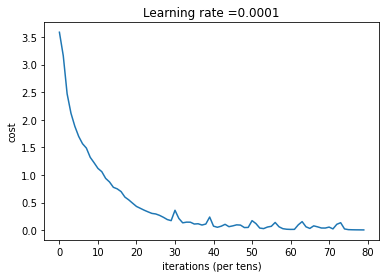

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9999102
Validation Accuracy: 0.9425287
Test Accuracy: 0.9420977


In [103]:
_, _, _, parameters = model(X_train, y_train, X_validation, y_validation, X_test, y_test)

## Conclusion:
When training this model, I set the number of epoches 80, batch_size 256, learning rate 1e-4, and the training accuracy is 99.99%, validation accuracy is 94.25%, and the test accuracy is 94.21%.